### Python Decorators 

Source: https://realpython.com/primer-on-python-decorators/

Before you can understand decorators, you must first understand how functions work. For our purposes, a function returns a value based on the given arguments. 

In [1]:
def add_one(number):
    return number + 1

add_one(2)

3

#### Functions are first-class objects 

In [29]:
def say_hello(name):
    return f"Hello {name}"

def be_awesome(name):
    return f"Yo {name}, together we are great!"

def greet_bob(greeter_func):
    return greeter_func("Bob") 

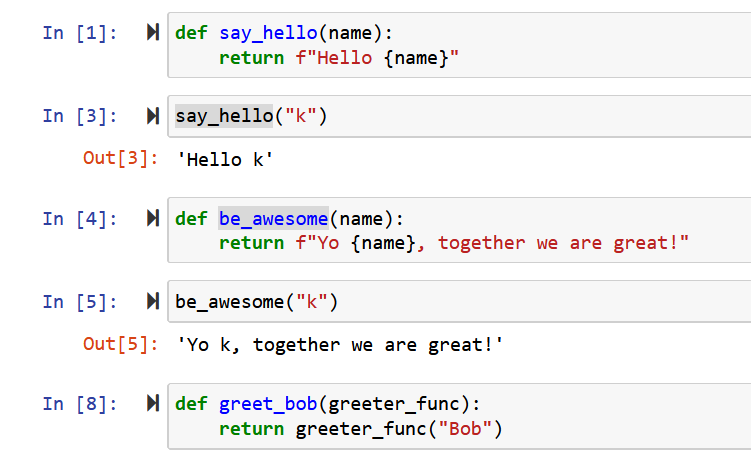

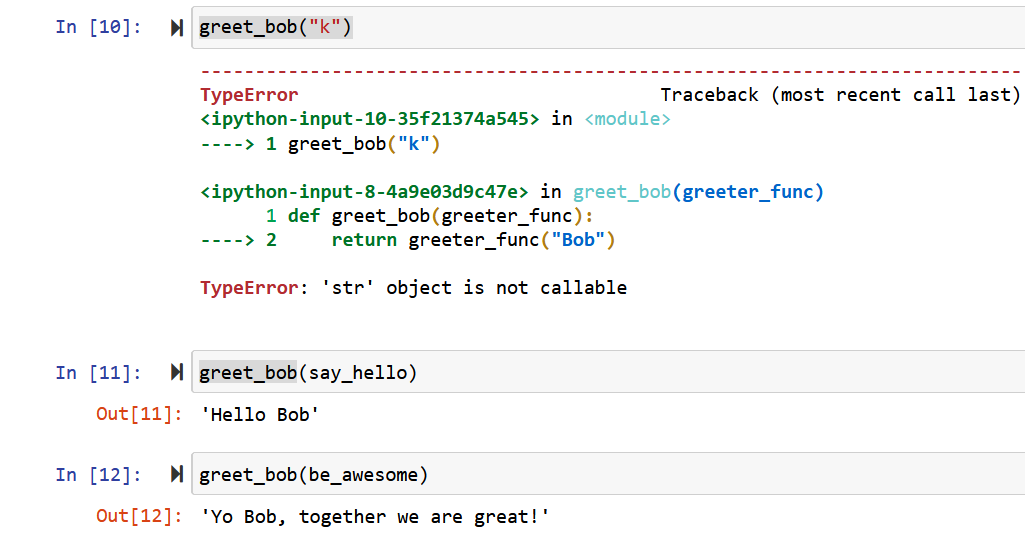

In [30]:
# Call a function greet_bob by passing a function say_hello 

greet_bob(say_hello)

'Hello Bob'

In [7]:
# Call a function greet_bob by passing a function be_awesome 

greet_bob(be_awesome)

'Yo Bob, together we are great!'

##### Inner functions 

It’s possible to define functions inside other functions. Such functions are called inner functions. Here’s an example of a function with two inner functions:

In [4]:
def parent():
    print("Printing from the parent() function")
    def first_child():
        print("Printing from the first_child() function")
    def second_child():
        print("Printing from the second_child() function")

    second_child()
    first_child()

### What happens when you call the parent() function?

In [5]:
parent()

Printing from the parent() function
Printing from the second_child() function
Printing from the first_child() function


In [9]:
def parent():
    print("Printing from the parent() function")

    def first_child():
        print("Printing from the first_child() function")

    def second_child():
        print("Printing from the second_child() function")

    
    first_child()
    second_child()

In [10]:
parent()

Printing from the parent() function
Printing from the first_child() function
Printing from the second_child() function


In [12]:
def parent1():
    
    def first_child():
        print("Printing from the first_child() function")

    def second_child():
        print("Printing from the second_child() function")
    
    first_child()
    print("we are somewhere in between function")
    second_child()

    print("Printing from the parent() function")
    

In [13]:
first_child()


NameError: name 'first_child' is not defined

`Note that the order in which the inner functions are defined does not matter. `

Like with any other functions, the printing only happens when the inner functions are executed.

Furthermore, the inner functions are not defined until the parent function is called. They are locally scoped to parent(): they only exist inside the parent() function as local variables. Try calling first_child(). You should get an error:

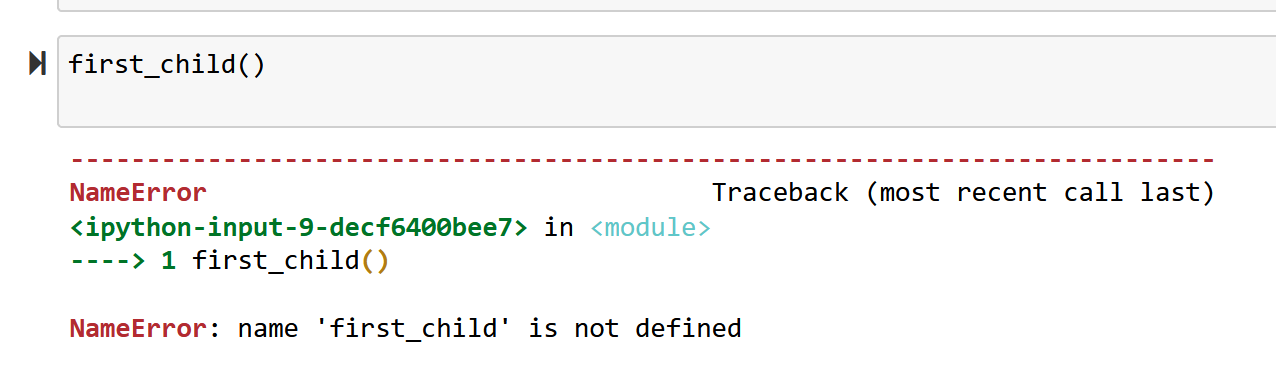

#### Returning Functions From Functions


In [15]:
def parent(num):
    def first_child():
        return "Hi, I am Emma"

    def second_child():
        return "Call me Liam"

    if num == 1:
        return first_child
    else:
        return second_child

In [16]:
first = parent(1)
second = parent(2)

The return value of the first call (parent(1)) is a reference to the inner function first_child,
which is then assigned to the variable first.

Note that the first and second variables now hold references to the first_child and second_child functions respectively, and not their return values.

To call the first_child and second_child functions, you can simply call the first and second variables as functions.

In [17]:
first

<function __main__.parent.<locals>.first_child()>

In [18]:
second

<function __main__.parent.<locals>.second_child()>

In [19]:
first()

'Hi, I am Emma'

In [20]:
second()

'Call me Liam'

In [21]:
f1 = parent(1)
f2 = parent(2)

In [22]:
f1()

'Hi, I am Emma'

In [23]:
f2()

'Call me Liam'

#### Another example Inner and Outer Function 

In [9]:
def outer_function(): 
    message = 'Hi'
    
    def inner_function(): 
        print("Message is " + message)
    return inner_function()

outer_function()

Message is Hi


In [11]:
def outer_function(): 
    message = 'Hi'
    
    def inner_function(): 
        print("Message is " + message)
    return inner_function

my_func=outer_function()
print(my_func)
my_func()

<function outer_function.<locals>.inner_function at 0x0000024A783BA700>
Message is Hi


In [7]:
def outer_function(msg): 
    message = msg
    
    def inner_function(): 
        print(message)
    return inner_function

hi_func=outer_function('Hi')
welcome_func= outer_function('Welcome')

hi_func()
welcome_func()

Hi
Welcome


In [10]:
def outer_function(msg): 
    def inner_function(): 
        print(msg)
    return inner_function

hi_func=outer_function('Hi')
welcome_func= outer_function('Welcome')

hi_func()
welcome_func()

Hi
Welcome


### Simple Decorators

`Dynamically Alter The Functionality Of Your Functions`

In [40]:
def my_decorator(func):
    print("Hello")
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    
    return print(wrapper) #here reference to wrapper function is returned


def say_whee():
    print("Whee!")

my_decorator(say_whee)

Hello
<function my_decorator.<locals>.wrapper at 0x000001CEA14DF3A0>


In [41]:
def my_decorator(func):
    print("Hello")
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    
    return wrapper() # here, actually a wrapper function is called

def say_whee():
    print("Whee!")

my_decorator(say_whee)

Hello
Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [42]:
 my_decorator(say_whee)

Hello
Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [43]:
say_whee = my_decorator(say_whee)

Hello
Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [45]:
print(say_whee)

None


In [47]:
help(say_whee)


Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



#### Decorator function using @

In [1]:
def print_decorator(func):
    def wrapper(arg):
        print("Function is starting...")
        result = func(arg)
        print("Function is ending...")
        return result
    return wrapper

@print_decorator
def my_function(x):
    return x ** 2

print(my_function(3))

Function is starting...
Function is ending...
9


In [12]:
# Background for decorator function 
def decorator_function(original_function):
    def wrapper_function():
        print("wrapper executed this before {}".format(original_function.__name__))
        return original_function()
    return wrapper_function 

def display(): 
    print("Display function ran")


decoarted_display=decorator_function(display)
decoarted_display()




wrapper executed this before display
Display function ran


In [ ]:
# Background for decorator function 
def decorator_function(original_function):
    def wrapper_function():
        print("wrapper executed this before {}".format(original_function.__name__))
        return original_function()
    return wrapper_function 

@decorator_function
def display(): 
    print("Display function ran")


display()

# Same as display= decorator_function(display)

https://youtu.be/FsAPt_9Bf3U?t=589

### Fully new examples from programiz 

In [1]:
def inc(x): 
    return x+1

def operate(func, x): 
    result=func(x)
    return result 

print(operate(inc,3))

4


In [3]:
def print_msg(message): 
    greeting= "Hello,"
    
    def printer(): 
        print(greeting, message)
    
    printer()
    
print_msg("Python is Awesome")

Hello, Python is Awesome


In [ ]:
# Function returning another function as a value 


In [10]:
def print_msg(message): 
    greeting= "Hello,"
    
    def printer(): 
        print(greeting, message)
    
    return printer
    
func=print_msg("Python is Awesome")
func()

Hello, Python is Awesome


#### Python Decorators 

In [11]:
def printer(): 
    print("Hello World")

def display_info(func): 
    def inner():
        print("Executing", func.__name__, "function")
        func()
        print("finished execution")
    
    return inner

printer()


Hello World


In [12]:
def printer(): 
    print("Hello World")

def display_info(func): 
    def inner():
        print("Executing", func.__name__, "function")
        func()
        print("finished execution")
    
    return inner

# Replace printer() from previous code 
decorated_func = display_info(printer)
decorated_func()

Executing printer function
Hello World
finished execution


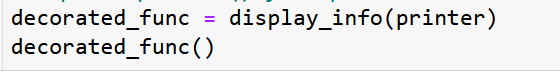

We have elegant way of writing above 2 lines using @ symbol 

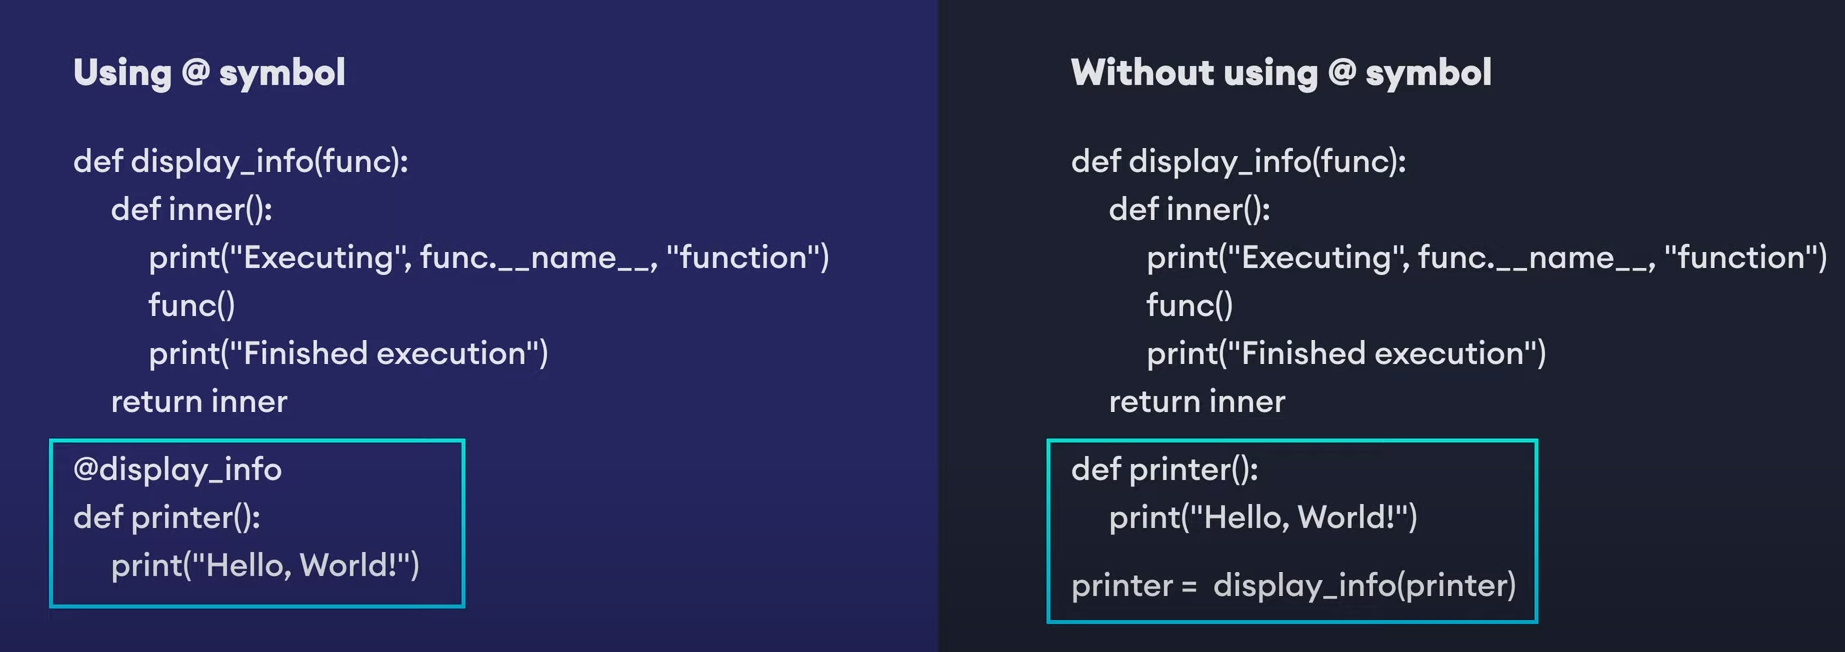

In [13]:
def display_info(func): 
    def inner():
        print("Executing", func.__name__, "function")
        func()
        print("finished execution")
    
    return inner

@display_info
def printer(): 
    print("Hello World")
    
printer()

Executing printer function
Hello World
finished execution


In [14]:
def smart_divide(func): 
    def inner(a,b): #inner func parameters should match with original function parameters
        print("Dividing", a, "by", b)
        if b==0: 
            print("cannot divide by 0!")
            return
        return func(a, b)
    return inner

@smart_divide
def divide(a,b): 
    return a/b

value1= divide(15,3)
print(value1)

value2=divide(5, 0)
print(value2)

Dividing 15 by 3
5.0
Dividing 5 by 0
cannot divide by 0!
None


In [15]:
# Chaining decorators 
def star(func): 
    def inner(arg): 
        print("*"*30)
        func(arg)
        print("*"*30)
    return inner 

def percent(func): 
    def inner(arg): 
        print("%"*30)
        func(arg)
        print("%"*30)
    return inner 

@star
@percent 
def printer(msg): 
    print(msg)

printer("Decorators are wonderful")

******************************
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Decorators are wonderful
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
******************************


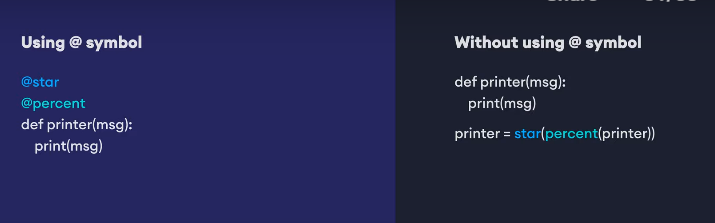

https://www.programiz.com/python-programming/decorator